In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, LSTM, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint

In [2]:
dataset = pd.read_csv("./R03_25")


In [3]:
dataset.drop(columns={"Unnamed: 0"}, inplace=True)

In [4]:
dataset.head()

,Fc5.,Fc3.,Fc1.,Fcz.,Fc2.,Fc4.,Fc6.,C5..,C3..,C1..,...,Po7.,Po3.,Poz.,Po4.,Po8.,O1..,Oz..,O2..,Iz..,label
0,-57.0,-13.0,-15.0,-12.0,-13.0,-8.0,-40.0,-54.0,-12.0,-14.0,...,-38.0,-42.0,-68.0,-76.0,-103.0,-51.0,-56.0,-124.0,-28.0,0
1,-49.0,-11.0,-10.0,-12.0,-19.0,-24.0,-58.0,-51.0,-19.0,-23.0,...,-55.0,-63.0,-82.0,-87.0,-99.0,-59.0,-70.0,-149.0,-40.0,0
2,-55.0,-17.0,-16.0,-19.0,-24.0,-29.0,-66.0,-61.0,-30.0,-36.0,...,-63.0,-72.0,-91.0,-92.0,-91.0,-67.0,-77.0,-153.0,-37.0,0
3,-73.0,-42.0,-40.0,-37.0,-37.0,-40.0,-71.0,-78.0,-53.0,-53.0,...,-52.0,-66.0,-100.0,-105.0,-105.0,-67.0,-72.0,-148.0,-26.0,0
4,-87.0,-53.0,-52.0,-51.0,-45.0,-43.0,-71.0,-87.0,-65.0,-64.0,...,-82.0,-90.0,-117.0,-119.0,-118.0,-75.0,-82.0,-161.0,-35.0,0


In [5]:
data = dataset.iloc[:,:32]
data['label'] = dataset['label']

In [6]:
data.head()

,Fc5.,Fc3.,Fc1.,Fcz.,Fc2.,Fc4.,Fc6.,C5..,C3..,C1..,...,Fp2.,Af7.,Af3.,Afz.,Af4.,Af8.,F7..,F5..,F3..,label
0,-57.0,-13.0,-15.0,-12.0,-13.0,-8.0,-40.0,-54.0,-12.0,-14.0,...,-131.0,-54.0,-55.0,-51.0,-70.0,-106.0,-20.0,-33.0,-28.0,0
1,-49.0,-11.0,-10.0,-12.0,-19.0,-24.0,-58.0,-51.0,-19.0,-23.0,...,-130.0,-46.0,-48.0,-44.0,-70.0,-110.0,-17.0,-14.0,-32.0,0
2,-55.0,-17.0,-16.0,-19.0,-24.0,-29.0,-66.0,-61.0,-30.0,-36.0,...,-129.0,-52.0,-54.0,-50.0,-76.0,-109.0,-27.0,-21.0,-44.0,0
3,-73.0,-42.0,-40.0,-37.0,-37.0,-40.0,-71.0,-78.0,-53.0,-53.0,...,-140.0,-65.0,-67.0,-63.0,-86.0,-117.0,-35.0,-46.0,-52.0,0
4,-87.0,-53.0,-52.0,-51.0,-45.0,-43.0,-71.0,-87.0,-65.0,-64.0,...,-131.0,-57.0,-59.0,-60.0,-78.0,-103.0,-42.0,-31.0,-55.0,0


In [7]:
data.shape

(493200, 33)

In [8]:
from sklearn.model_selection import train_test_split
X = data.drop(columns={"label"})
Y = data['label']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
X_train = np.array(X_train)
X_test = np.array(X_test)
scaler = StandardScaler()
X_train_scaled =  scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_reshaped = X_train_scaled.reshape(X_train.shape[0],X_train.shape[1],1)
X_test_reshaped = X_test_scaled.reshape(X_test.shape[0],X_test.shape[1],1)

num_samples = X_train.shape[0]
num_features = X_train.shape[1]


In [9]:
train_accuracies = []
val_accuracies = []

In [10]:
model = Sequential()
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Conv1D(64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Conv1D(128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Conv1D(128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))  # Adjust dropout rate as needed
model.add(Dense(3, activation='softmax'))


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [11]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [13]:
epochs = 100
for epoch in range(epochs):
    print(f"epoch {epoch+1}/100")
    history = model.fit(X_train_reshaped, Y_train, validation_split=0.1,epochs=1, batch_size=32,callbacks=[early_stopping])  
    train_accuracies.append(history.history['acc'][0])
    val_accuracies.append(history.history['val_acc'][0])


epoch 1/100
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 355104 samples, validate on 39456 samples
355104/355104 [==============================] - 144s 404us/sample - loss: 0.9411 - acc: 0.5575 - val_loss: 0.8218 - val_acc: 0.6163
epoch 2/100
Train on 355104 samples, validate on 39456 samples
355104/355104 [==============================] - 140s 396us/sample - loss: 0.7984 - acc: 0.6350 - val_loss: 0.7494 - val_acc: 0.6566
epoch 3/100
Train on 355104 samples, validate on 39456 samples
355104/355104 [==============================] - 141s 396us/sample - loss: 0.7351 - acc: 0.6670 - val_loss: 0.6838 - val_acc: 0.6888
epoch 4/100
Train on 355104 samples, validate on 39456 samples
355104/355104 [==============================] - 140s 395us/sample - loss: 0.6987 - acc: 0.6839 - val_loss: 0.6647 - val_acc: 0.6985
epoch 5/100
Train on 355104 samples, validate on 39456 samples
355104/355104 [==============================] - 140s 395us

In [20]:
test_loss, test_accuracy = model.evaluate(X_test_reshaped, Y_test, verbose=0)

print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

Test Loss: 0.5258
Test Accuracy: 0.7742


In [21]:
model.save('saved_model.h5')

In [22]:
model.save_weights('model_weights.h5')

In [23]:
checkpoint_path = "saved_model.h5"
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    save_best_only=True,
    monitor='val_loss',  # Choose a suitable metric to monitor
    mode='min',  # or 'max' depending on the metric
    verbose=1
)

In [30]:
print(train_accuracies)
print(len(train_accuracies))
print(sum(train_accuracies))

[0.5574536, 0.63496894, 0.6670384, 0.68391794, 0.69777024, 0.7085558, 0.71661824, 0.7237598, 0.7285753, 0.733357, 0.73822033, 0.7410392, 0.74475366, 0.74869055, 0.75230634, 0.7561447, 0.7580765, 0.76188946, 0.76304406, 0.76538986, 0.76803696, 0.76978576, 0.7716922, 0.7733819, 0.7744745, 0.7767837, 0.7787127, 0.7798842, 0.7825116, 0.78328323, 0.78441244, 0.7862204, 0.78716093, 0.7887126, 0.7885183, 0.7900249, 0.79276496, 0.7931169, 0.79366326, 0.7958936, 0.7972876, 0.79618365, 0.79777193, 0.7986055, 0.79987556, 0.80098504, 0.80147505, 0.8020495, 0.8025536, 0.8040321, 0.80404615, 0.8054598, 0.80649894, 0.8064229, 0.8062849, 0.8072818, 0.80881375, 0.8094615, 0.80897146, 0.8106921, 0.81101876, 0.81158197, 0.8125, 0.8122353, 0.8139869, 0.8126915, 0.81364334, 0.81338704, 0.8154484, 0.8150091, 0.8150429, 0.81618345, 0.8167692, 0.8172676, 0.81687057, 0.8180589, 0.81797165, 0.81872636, 0.818977, 0.8193431, 0.81953454, 0.82005554, 0.8210102, 0.8209398, 0.820906, 0.82158464, 0.82223237, 0.8219676

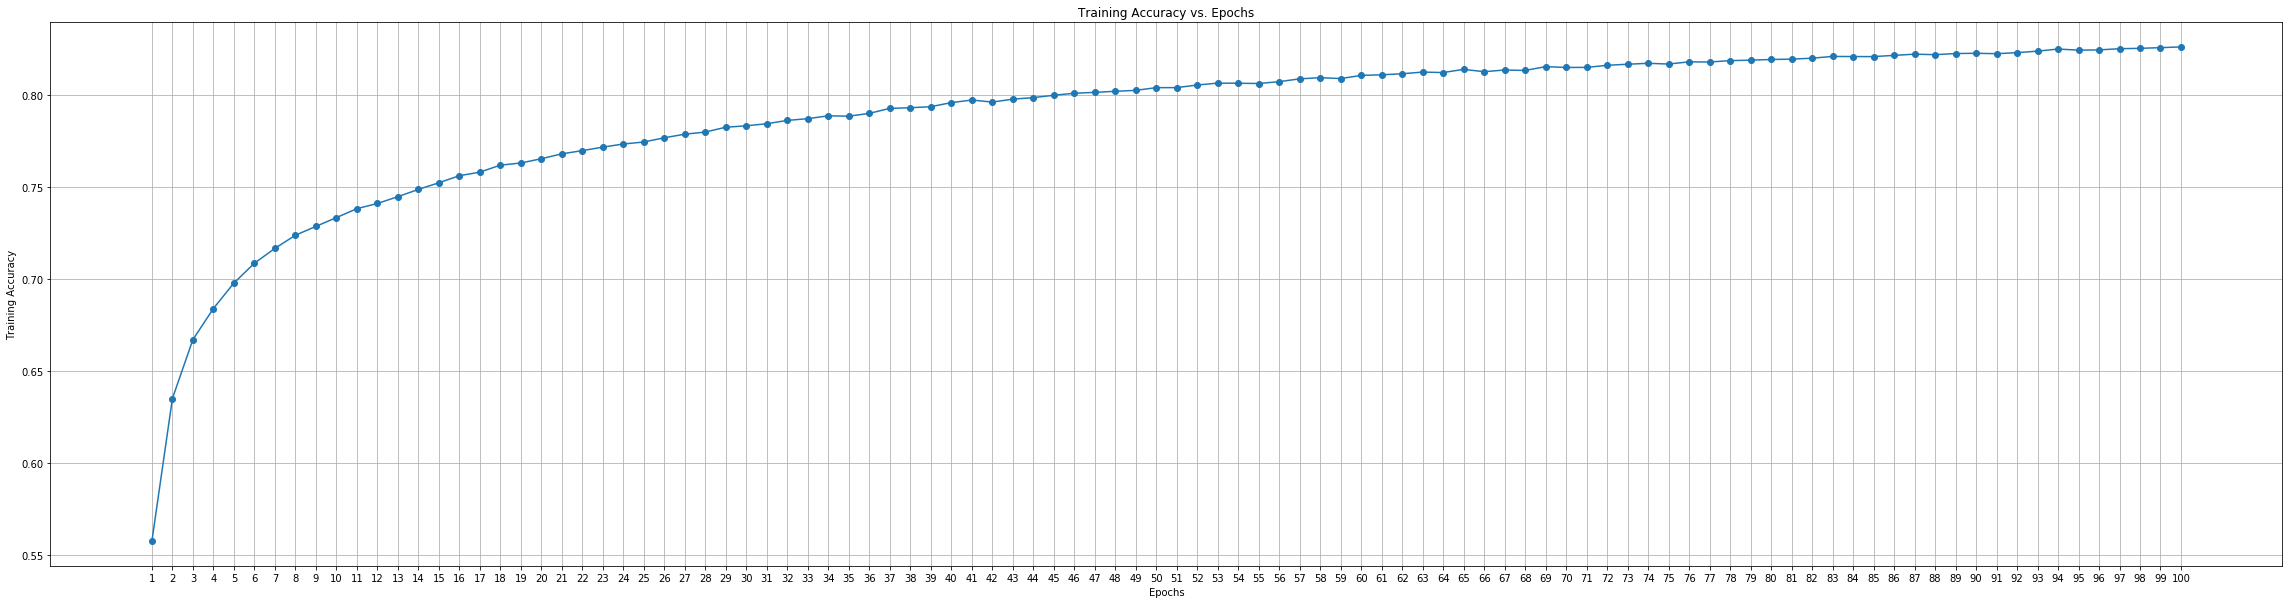

In [26]:
import matplotlib.pyplot as plt
epochs_list = [i for i in range(1,101)]
plt.figure(figsize=(40,10))
plt.plot(epochs_list, train_accuracies, marker='o', linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy vs. Epochs')
plt.grid(True)
plt.xticks(range(1, 101))

plt.show()

In [27]:
print(max(train_accuracies))

0.8261861


In [28]:
y_test_data = np.array(Y_test)

y_test_data.shape

(98640,)

In [29]:
from sklearn.metrics import accuracy_score

input_data = np.array(X_test_reshaped[2390]).reshape(1,X_test_reshaped[0].shape[0], X_test_reshaped[0].shape[1])

print(input_data.shape)
pred = model.predict(input_data)
y_pred_labels = np.argmax(pred, axis=1)

print("True Label:", Y_test.iloc[0])  
print("Predicted Label:", y_pred_labels[0])
print("Predicted Probabilities:", pred)



(1, 32, 1)
True Label: 0
Predicted Label: 2
Predicted Probabilities: [[0.18855987 0.06981031 0.74162984]]


## 